 # Netflix Titles Analysis 

### Mini project by Evie Vujovic

#### This project explores the patterns and trends of the popular streaming Platform Netflix and its available films and series.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df = pd.read_csv("netflix_titles.csv")
df.head()
df.info() 
df.describe(include=['object']).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


#### I have imported the required libraries and set the dataframe to visually describe the core elements. It shows in the count column from the range index there are 8807 total netflix titles. If the count isn't that, it shows the amount of missing values. 

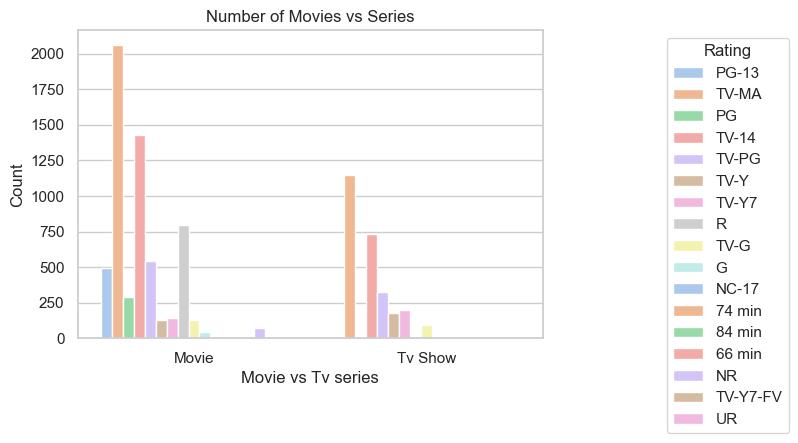

type
Movie      6131
Tv Show    2676
Name: count, dtype: int64


In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='rating', palette='pastel') 
plt.title("Number of Movies vs Series")
plt.xlabel("Movie vs Tv series")
plt.ylabel("Count")
plt.legend(title='Rating', bbox_to_anchor=(1.25, 1), loc='upper left') 
plt.show()
 
df['type'] = df['type'].str.strip().str.title()
print(df['type'].value_counts())
 

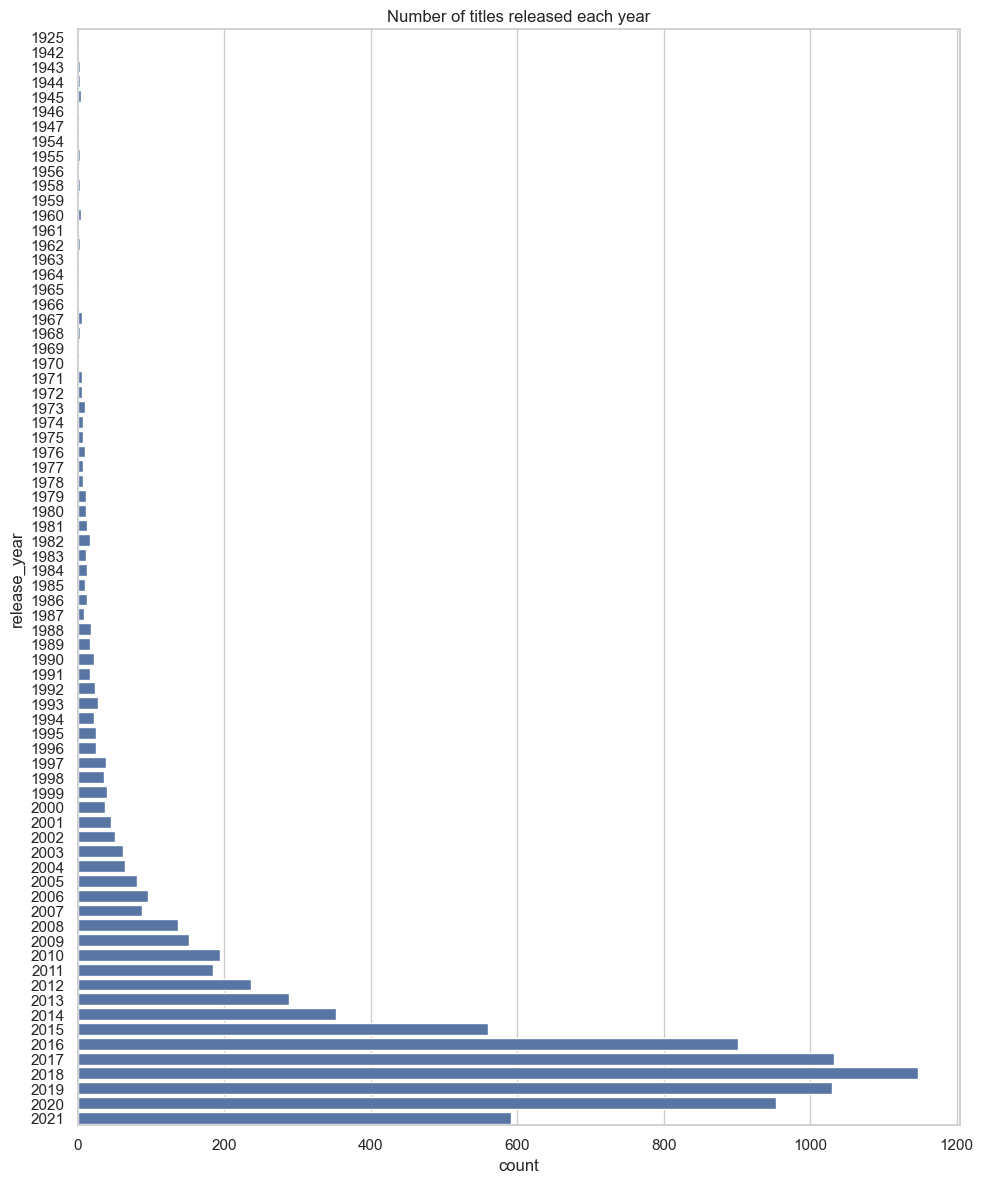

In [53]:
plt.figure(figsize=(10,12))
sns.countplot(data=df, y='release_year', order=sorted(df['release_year'].dropna().unique())) 
plt.title("Number of titles released each year")
plt.tight_layout() 
plt.show()  

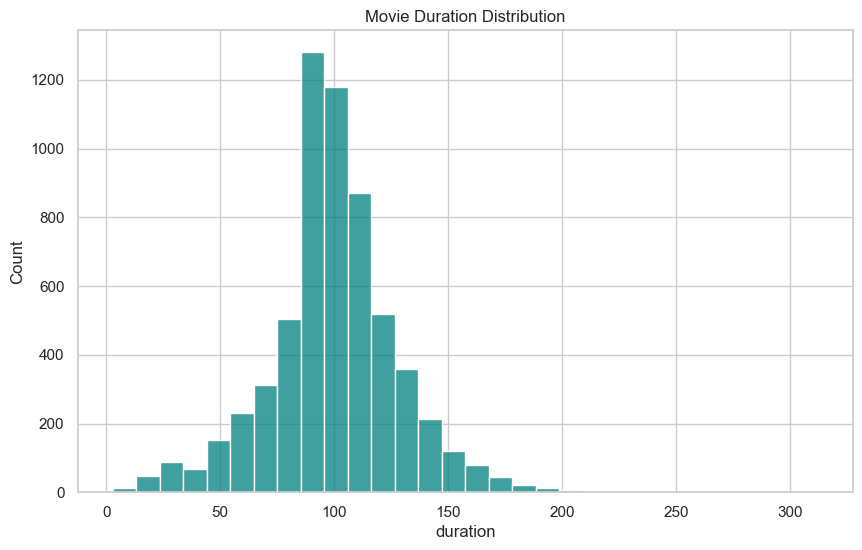

In [63]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace('min', ' ').astype(float)
plt.figure(figsize=(10,6))
plt.title("Movie Duration Distribution")
sns.histplot(data=movies_df, x='duration', bins=30, color='teal')
plt.show()       
  

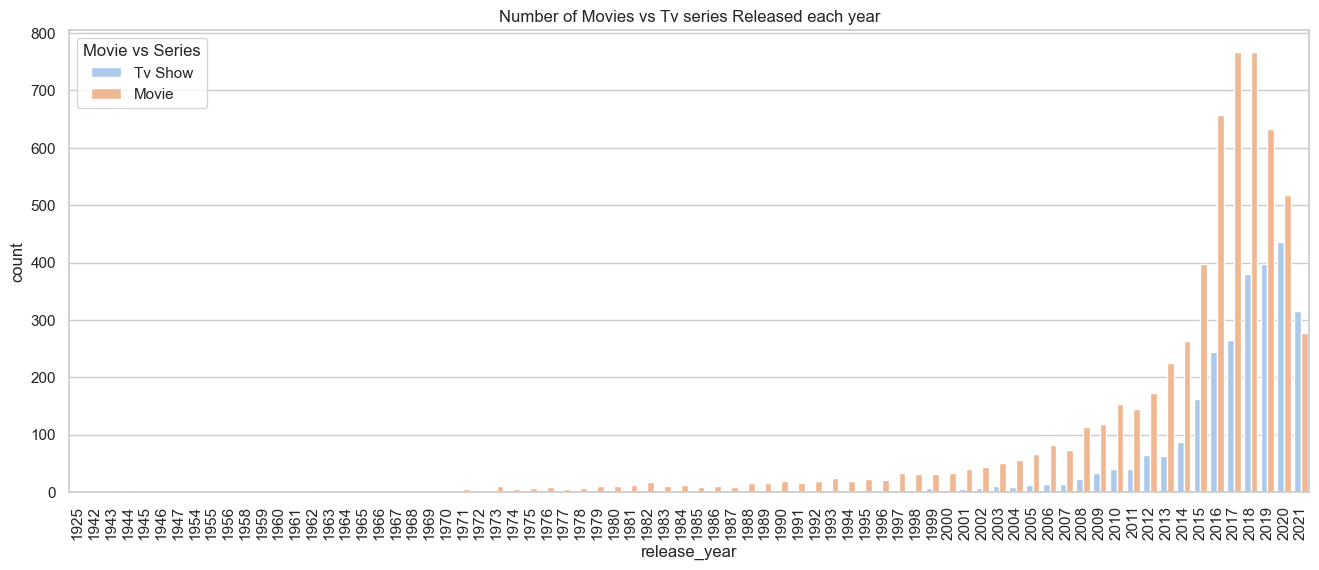

In [73]:
df_clean = df.dropna(subset=['release_year', 'type'])
year_type_counts = df_clean.groupby(['release_year', 'type']).size().reset_index(name='count')
year_type_counts = year_type_counts.sort_values('release_year')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
filtered = year_type_counts[year_type_counts['release_year'] >=2015]
sns.barplot(data=year_type_counts, x='release_year', y='count',hue='type', palette='pastel')
plt.title("Number of Movies vs Tv series Released each year")
plt.legend(title="Movie vs Series")
plt.xticks(rotation=90)  
plt.show()  


  

#### From the figures above in the Netflix titles analysis mini project, I found the streaming platform to host a considerable amount of titles - 8807 in total. It also revealed how the platform uses business strategy and user preferences for economic growth. Initially, the first figure showed how movies outgrew tv series in numbers, showing the sites investment into the film categories section despite tv series becoming exponentially popular globally. Only highlighting its diverse range available to the viewer boosting its popularity itself. The next figure expands on the number of titles per year. With a rapid increase during 2010 and 2015-2020. Possibly due to meeting global demand, the transition from rental DVD's to a streaming platform as well as major company investment to set it apart from others. While the third figure exploring movie durations highlights the most popular range spanning from 90-120 minutes which could be considered a standard viewing time - e.g. for a cinema sitting. And lastly, the comparison of movies vs series broken down per year further emphasises the first figures analysis as there is now an override of serialized content over movies. While Netflix remains boasting its wide range of viewings, it is also catching up with the increasing demand for tv series helping its engagement and growth.   